In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


Matplotlib created a temporary cache directory at C:\Users\Dell\AppData\Local\Temp\matplotlib-dgpzfmro because the default path (C:\Users\Dell\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
data_train = pd.read_csv('data/train.csv')
data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
data_test = pd.read_csv('data/test.csv')
data_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print(data_train.shape)
print(data_test.shape)

(1460, 81)
(1459, 80)


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
missing_data = data_train.isna().sum()
missing_percentage = (missing_data / len(data_train)) * 100

print(missing_data)
print(missing_percentage)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [7]:
miss = data_train.isna().sum()
perc = list((missing_data / len(data_train)) * 100)
i = 0
new_l = []
cols = []
for p in perc:
    if p != 0.0:
        new_l.append(np.round(p, 2))
        cols.append(data_train.columns[i])
    i += 1

print(new_l)
print(cols)
# print(list(miss))
# print(list(data_train.columns))

[17.74, 93.77, 59.73, 0.55, 2.53, 2.53, 2.6, 2.53, 2.6, 0.07, 47.26, 5.55, 5.55, 5.55, 5.55, 5.55, 99.52, 80.75, 96.3]
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
new_data = data_train.drop(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [9]:
dic = {}
for col in new_data.columns:
    if new_data[col].dtype == 'object':
        dic[col] = new_data[col].nunique()

dic

{'MSZoning': 5,
 'Street': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinType2': 6,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 'KitchenQual': 4,
 'Functional': 7,
 'GarageType': 6,
 'GarageFinish': 3,
 'GarageQual': 5,
 'GarageCond': 5,
 'PavedDrive': 3,
 'SaleType': 9,
 'SaleCondition': 6}

In [10]:
new_data = new_data.drop(['Id', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType', 'RoofMatl', 'HouseStyle', 'Condition1', 'Condition2'], axis=1)

In [11]:
new_data.nunique()

MSSubClass         15
MSZoning            5
LotArea          1073
Street              2
LotShape            4
                 ... 
MiscVal            21
MoSold             12
YrSold              5
SaleCondition       6
SalePrice         663
Length: 64, dtype: int64

In [12]:
new_data.dropna(inplace=True)
new_data.head(20)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,...,61,0,0,0,0,0,2,2008,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,1Fam,...,0,0,0,0,0,0,5,2007,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,...,42,0,0,0,0,0,9,2008,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,...,35,272,0,0,0,0,2,2006,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,1Fam,...,84,0,0,0,0,0,12,2008,Normal,250000
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,...,30,0,320,0,0,700,10,2009,Normal,143000
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,...,57,0,0,0,0,0,8,2007,Normal,307000
7,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,...,204,228,0,0,0,350,11,2009,Normal,200000
8,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,...,0,205,0,0,0,0,4,2008,Abnorml,129900
9,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,2fmCon,...,4,0,0,0,0,0,1,2008,Normal,118000


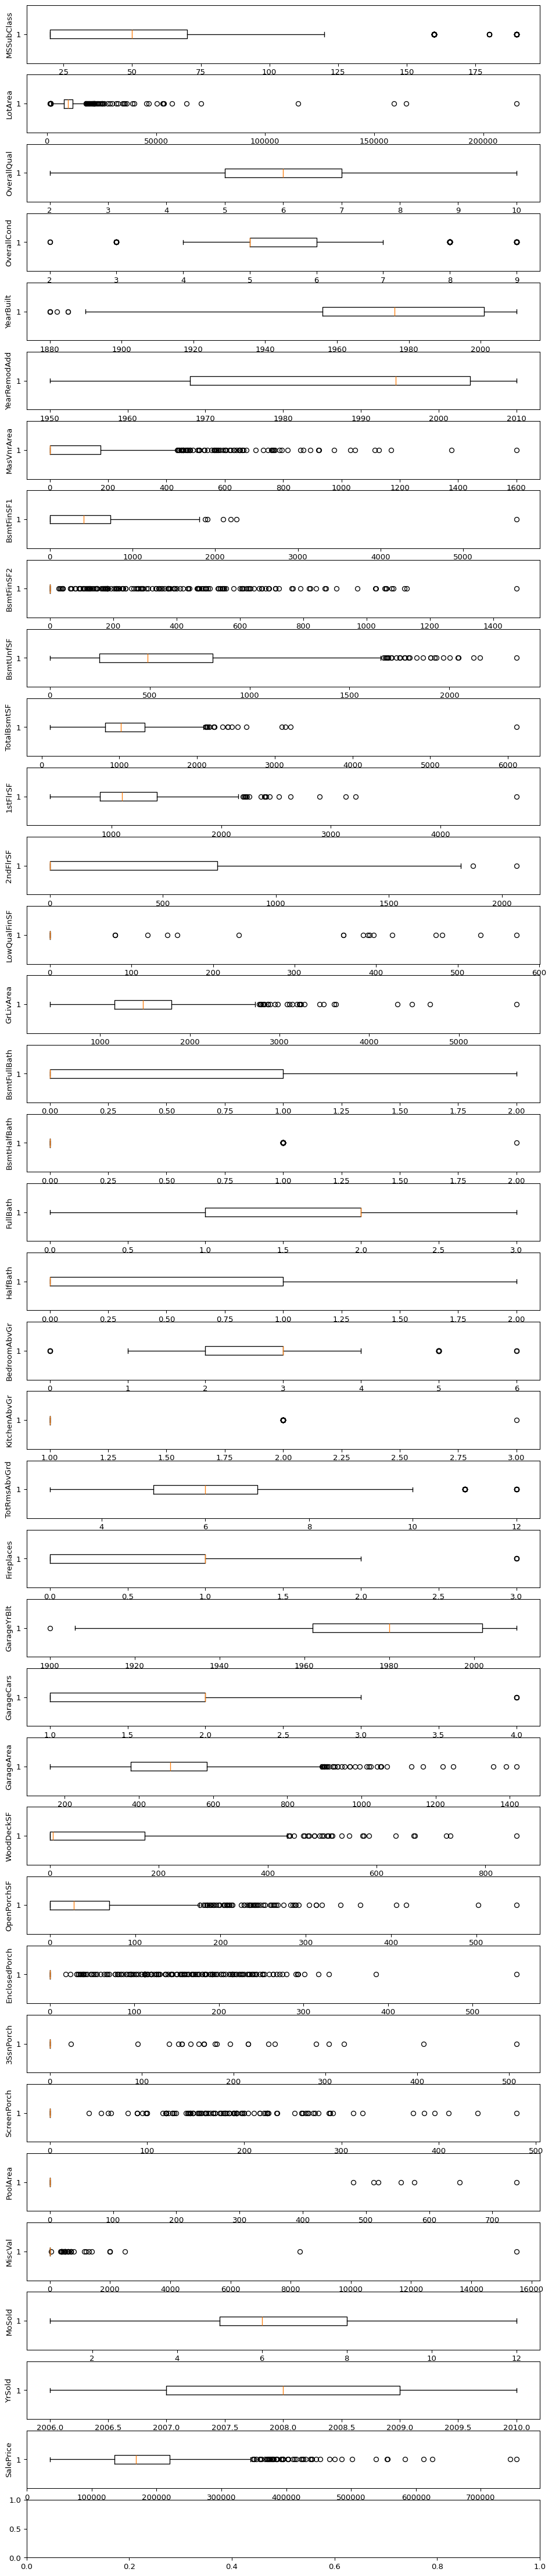

In [13]:
def show_outliers():
    fig, axs = plt.subplots(37, 1, dpi=95, figsize=(12, 60))
    i = 0
    for col in new_data.columns:
        if new_data[col].dtype != 'object':
            axs[i].boxplot(new_data[col], vert=False)
            axs[i].set_ylabel(col)
            i += 1
    plt.show()

show_outliers()

In [14]:
data_no_outliers1 = new_data.drop(['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1)
data_no_outliers1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   Street         1338 non-null   object 
 3   LotShape       1338 non-null   object 
 4   LandContour    1338 non-null   object 
 5   Utilities      1338 non-null   object 
 6   LotConfig      1338 non-null   object 
 7   LandSlope      1338 non-null   object 
 8   BldgType       1338 non-null   object 
 9   OverallQual    1338 non-null   int64  
 10  OverallCond    1338 non-null   int64  
 11  YearBuilt      1338 non-null   int64  
 12  YearRemodAdd   1338 non-null   int64  
 13  RoofStyle      1338 non-null   object 
 14  MasVnrArea     1338 non-null   float64
 15  ExterQual      1338 non-null   object 
 16  ExterCond      1338 non-null   object 
 17  Foundation     1338 non-null   object 
 18  BsmtQual     

In [15]:
new_data = data_no_outliers1

In [16]:
# def remove_outliers():
for col in new_data.columns:
    if new_data[col].dtype == 'object':
        continue
    Q1 = new_data[col].quantile(0.25)
    Q3 = new_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    new_data = new_data[(new_data[col] >= lower_bound) & (new_data[col] <= upper_bound)]
    
# remove_outliers()
print(new_data.shape)

(882, 54)


In [17]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,882.0,48.117914,30.201287,20.0,20.00,50.0,60.00,120.0
OverallQual,882.0,6.003401,1.118917,2.0,5.00,6.0,7.00,9.0
OverallCond,882.0,5.518141,0.803094,4.0,5.00,5.0,6.00,7.0
YearBuilt,882.0,1973.020408,27.817298,1900.0,1955.00,1975.0,2000.00,2009.0
YearRemodAdd,882.0,1983.493197,20.807546,1950.0,1964.00,1991.0,2003.00,2010.0
MasVnrArea,882.0,67.214286,106.683182,0.0,0.00,0.0,118.50,448.0
BsmtFinSF1,882.0,416.070295,380.605739,0.0,0.00,392.0,685.00,1606.0
BsmtUnfSF,882.0,574.523810,408.739992,0.0,253.00,502.5,815.75,1710.0
TotalBsmtSF,882.0,1040.326531,293.210721,264.0,832.00,990.0,1236.25,1845.0
1stFlrSF,882.0,1114.642857,289.661857,438.0,888.00,1060.5,1314.00,2073.0


In [18]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 0 to 1458
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     882 non-null    int64  
 1   MSZoning       882 non-null    object 
 2   Street         882 non-null    object 
 3   LotShape       882 non-null    object 
 4   LandContour    882 non-null    object 
 5   Utilities      882 non-null    object 
 6   LotConfig      882 non-null    object 
 7   LandSlope      882 non-null    object 
 8   BldgType       882 non-null    object 
 9   OverallQual    882 non-null    int64  
 10  OverallCond    882 non-null    int64  
 11  YearBuilt      882 non-null    int64  
 12  YearRemodAdd   882 non-null    int64  
 13  RoofStyle      882 non-null    object 
 14  MasVnrArea     882 non-null    float64
 15  ExterQual      882 non-null    object 
 16  ExterCond      882 non-null    object 
 17  Foundation     882 non-null    object 
 18  BsmtQual      

In [19]:
for col in new_data.columns:
    print(new_data[col].value_counts())

MSSubClass
20     363
60     189
50      97
120     70
80      47
30      40
70      30
85      17
90      15
45       7
75       4
40       3
Name: count, dtype: int64
MSZoning
RL         749
RM          97
FV          23
RH           8
C (all)      5
Name: count, dtype: int64
Street
Pave    880
Grvl      2
Name: count, dtype: int64
LotShape
Reg    539
IR1    312
IR2     24
IR3      7
Name: count, dtype: int64
LandContour
Lvl    796
Bnk     36
HLS     32
Low     18
Name: count, dtype: int64
Utilities
AllPub    882
Name: count, dtype: int64
LotConfig
Inside     643
Corner     148
CulDSac     61
FR2         29
FR3          1
Name: count, dtype: int64
LandSlope
Gtl    839
Mod     38
Sev      5
Name: count, dtype: int64
BldgType
1Fam      799
TwnhsE     62
Duplex     15
Twnhs       5
2fmCon      1
Name: count, dtype: int64
OverallQual
5    260
6    252
7    223
8     82
4     60
9      2
3      2
2      1
Name: count, dtype: int64
OverallCond
5    524
6    184
7    149
4     25
Name: coun

In [20]:
data = new_data.drop(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrArea', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', '2ndFlrSF', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 0 to 1458
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    882 non-null    int64  
 1   LotShape      882 non-null    object 
 2   OverallQual   882 non-null    int64  
 3   OverallCond   882 non-null    int64  
 4   YearBuilt     882 non-null    int64  
 5   YearRemodAdd  882 non-null    int64  
 6   ExterQual     882 non-null    object 
 7   Foundation    882 non-null    object 
 8   BsmtQual      882 non-null    object 
 9   BsmtFinType1  882 non-null    object 
 10  BsmtFinSF1    882 non-null    int64  
 11  BsmtUnfSF     882 non-null    int64  
 12  TotalBsmtSF   882 non-null    int64  
 13  HeatingQC     882 non-null    object 
 14  1stFlrSF      882 non-null    int64  
 15  GrLivArea     882 non-null    int64  
 16  BsmtFullBath  882 non-null    int64  
 17  FullBath      882 non-null    int64  
 18  HalfBath      882 non-null    int6

In [21]:
data.head(20)

,MSSubClass,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtQual,BsmtFinType1,...,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SalePrice
0,60,Reg,7,5,2003,2003,Gd,PConc,Gd,GLQ,...,8,0,Attchd,2003.0,RFn,2,548,2,2008,208500
2,60,IR1,7,5,2001,2002,Gd,PConc,Gd,GLQ,...,6,1,Attchd,2001.0,RFn,2,608,9,2008,223500
3,70,IR1,7,5,1915,1970,TA,BrkTil,TA,ALQ,...,7,1,Detchd,1998.0,Unf,3,642,2,2006,140000
4,60,IR1,8,5,2000,2000,Gd,PConc,Gd,GLQ,...,9,1,Attchd,2000.0,RFn,3,836,12,2008,250000
5,50,IR1,5,5,1993,1995,TA,Wood,Gd,GLQ,...,5,0,Attchd,1993.0,Unf,2,480,10,2009,143000
8,50,Reg,7,5,1931,1950,TA,BrkTil,TA,Unf,...,8,2,Detchd,1931.0,Unf,2,468,4,2008,129900
10,20,Reg,5,5,1965,1965,TA,CBlock,TA,Rec,...,5,0,Detchd,1965.0,Unf,1,384,2,2008,129500
12,20,IR2,5,6,1962,1962,TA,CBlock,TA,ALQ,...,4,0,Detchd,1962.0,Unf,1,352,9,2008,144000
13,20,IR1,7,5,2006,2007,Gd,PConc,Gd,Unf,...,7,1,Attchd,2006.0,RFn,3,840,8,2007,279500
16,20,IR1,6,7,1970,1970,TA,CBlock,TA,ALQ,...,5,1,Attchd,1970.0,Fin,2,480,3,2010,149000


In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,882.0,48.117914,30.201287,20.0,20.00,50.0,60.00,120.0
OverallQual,882.0,6.003401,1.118917,2.0,5.00,6.0,7.00,9.0
OverallCond,882.0,5.518141,0.803094,4.0,5.00,5.0,6.00,7.0
YearBuilt,882.0,1973.020408,27.817298,1900.0,1955.00,1975.0,2000.00,2009.0
YearRemodAdd,882.0,1983.493197,20.807546,1950.0,1964.00,1991.0,2003.00,2010.0
BsmtFinSF1,882.0,416.070295,380.605739,0.0,0.00,392.0,685.00,1606.0
BsmtUnfSF,882.0,574.523810,408.739992,0.0,253.00,502.5,815.75,1710.0
TotalBsmtSF,882.0,1040.326531,293.210721,264.0,832.00,990.0,1236.25,1845.0
1stFlrSF,882.0,1114.642857,289.661857,438.0,888.00,1060.5,1314.00,2073.0
GrLivArea,882.0,1404.197279,370.347371,438.0,1116.25,1392.0,1658.75,2574.0


In [23]:
dic = {}
for col in data.columns:
    if data[col].dtype == 'object':
        dic[col] = list(data[col].unique())

dic

{'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'Foundation': ['PConc', 'BrkTil', 'Wood', 'CBlock', 'Stone'],
 'BsmtQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'LwQ', 'BLQ'],
 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'KitchenQual': ['Gd', 'TA', 'Fa', 'Ex'],
 'GarageType': ['Attchd', 'Detchd', 'CarPort', 'BuiltIn', 'Basment', '2Types'],
 'GarageFinish': ['RFn', 'Unf', 'Fin']}

In [24]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

ordinal_cols = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']
label_cols = ['LotShape', 'Foundation', 'BsmtFinType1', 'GarageType', 'GarageFinish']

for col in ordinal_cols:
    grades = list(data[col].unique())
    encoder = OrdinalEncoder()
    data[col] = encoder.fit_transform(data[[col]])

for col in label_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

print(data['ExterQual'])
print(data['LotShape'])

0       2.0
2       2.0
3       3.0
4       2.0
5       3.0
       ... 
1451    2.0
1454    2.0
1455    3.0
1456    3.0
1458    3.0
Name: ExterQual, Length: 882, dtype: float64
0       3
2       0
3       0
4       0
5       0
       ..
1451    3
1454    3
1455    3
1456    3
1458    3
Name: LotShape, Length: 882, dtype: int32


In [25]:
data.sample(20)

,MSSubClass,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtQual,BsmtFinType1,...,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SalePrice
385,120,3,8,5,2004,2005,2.0,2,2.0,2,...,6,1,1,2004.0,0,2,430,4,2010,192000
1273,80,0,6,7,1959,2006,3.0,1,3.0,0,...,5,1,2,1959.0,1,1,312,5,2008,177000
1426,60,0,7,5,1994,1994,2.0,2,2.0,2,...,5,2,1,1994.0,1,2,525,8,2008,271000
1444,20,3,7,5,2004,2004,2.0,2,2.0,5,...,7,0,1,2004.0,1,2,626,11,2007,179600
1260,60,2,6,5,1999,1999,3.0,2,2.0,5,...,7,1,3,1999.0,0,2,502,6,2009,181000
900,20,0,4,6,1971,1971,3.0,1,3.0,0,...,4,0,5,1979.0,2,1,684,6,2007,110000
131,60,0,6,5,2000,2000,2.0,2,2.0,2,...,7,1,3,2000.0,1,2,390,7,2009,244000
739,60,0,7,5,2004,2004,2.0,2,2.0,5,...,7,0,1,2004.0,1,2,572,4,2009,190000
1118,80,3,5,6,1958,1987,3.0,1,3.0,5,...,6,0,3,1958.0,1,1,300,12,2008,140000
657,70,3,7,6,1931,2000,3.0,0,2.0,5,...,6,1,1,1931.0,1,1,270,2,2008,149000


In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,882.0,48.117914,30.201287,20.0,20.00,50.0,60.00,120.0
LotShape,882.0,1.876417,1.428401,0.0,0.00,3.0,3.00,3.0
OverallQual,882.0,6.003401,1.118917,2.0,5.00,6.0,7.00,9.0
OverallCond,882.0,5.518141,0.803094,4.0,5.00,5.0,6.00,7.0
YearBuilt,882.0,1973.020408,27.817298,1900.0,1955.00,1975.0,2000.00,2009.0
YearRemodAdd,882.0,1983.493197,20.807546,1950.0,1964.00,1991.0,2003.00,2010.0
ExterQual,882.0,2.640590,0.505438,0.0,2.00,3.0,3.00,3.0
Foundation,882.0,1.373016,0.660442,0.0,1.00,1.0,2.00,4.0
BsmtQual,882.0,2.384354,0.684434,0.0,2.00,2.0,3.00,3.0
BsmtFinType1,882.0,2.743764,1.824941,0.0,1.00,2.0,5.00,5.0


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaling_cols = ['BsmtFinSF1', 'BsmtUnfSF']

scaler = MinMaxScaler(feature_range=(500, 1000))

for col in scaling_cols:
    data[col] = scaler.fit_transform(data[[col]])

data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,882.0,48.117914,30.201287,20.0,20.000000,50.000000,60.000000,120.0
LotShape,882.0,1.876417,1.428401,0.0,0.000000,3.000000,3.000000,3.0
OverallQual,882.0,6.003401,1.118917,2.0,5.000000,6.000000,7.000000,9.0
OverallCond,882.0,5.518141,0.803094,4.0,5.000000,5.000000,6.000000,7.0
YearBuilt,882.0,1973.020408,27.817298,1900.0,1955.000000,1975.000000,2000.000000,2009.0
YearRemodAdd,882.0,1983.493197,20.807546,1950.0,1964.000000,1991.000000,2003.000000,2010.0
ExterQual,882.0,2.640590,0.505438,0.0,2.000000,3.000000,3.000000,3.0
Foundation,882.0,1.373016,0.660442,0.0,1.000000,1.000000,2.000000,4.0
BsmtQual,882.0,2.384354,0.684434,0.0,2.000000,2.000000,3.000000,3.0
BsmtFinType1,882.0,2.743764,1.824941,0.0,1.000000,2.000000,5.000000,5.0


In [28]:
data.shape

(882, 31)

In [29]:
data.to_csv('cleaned_train_data.csv', index=False)

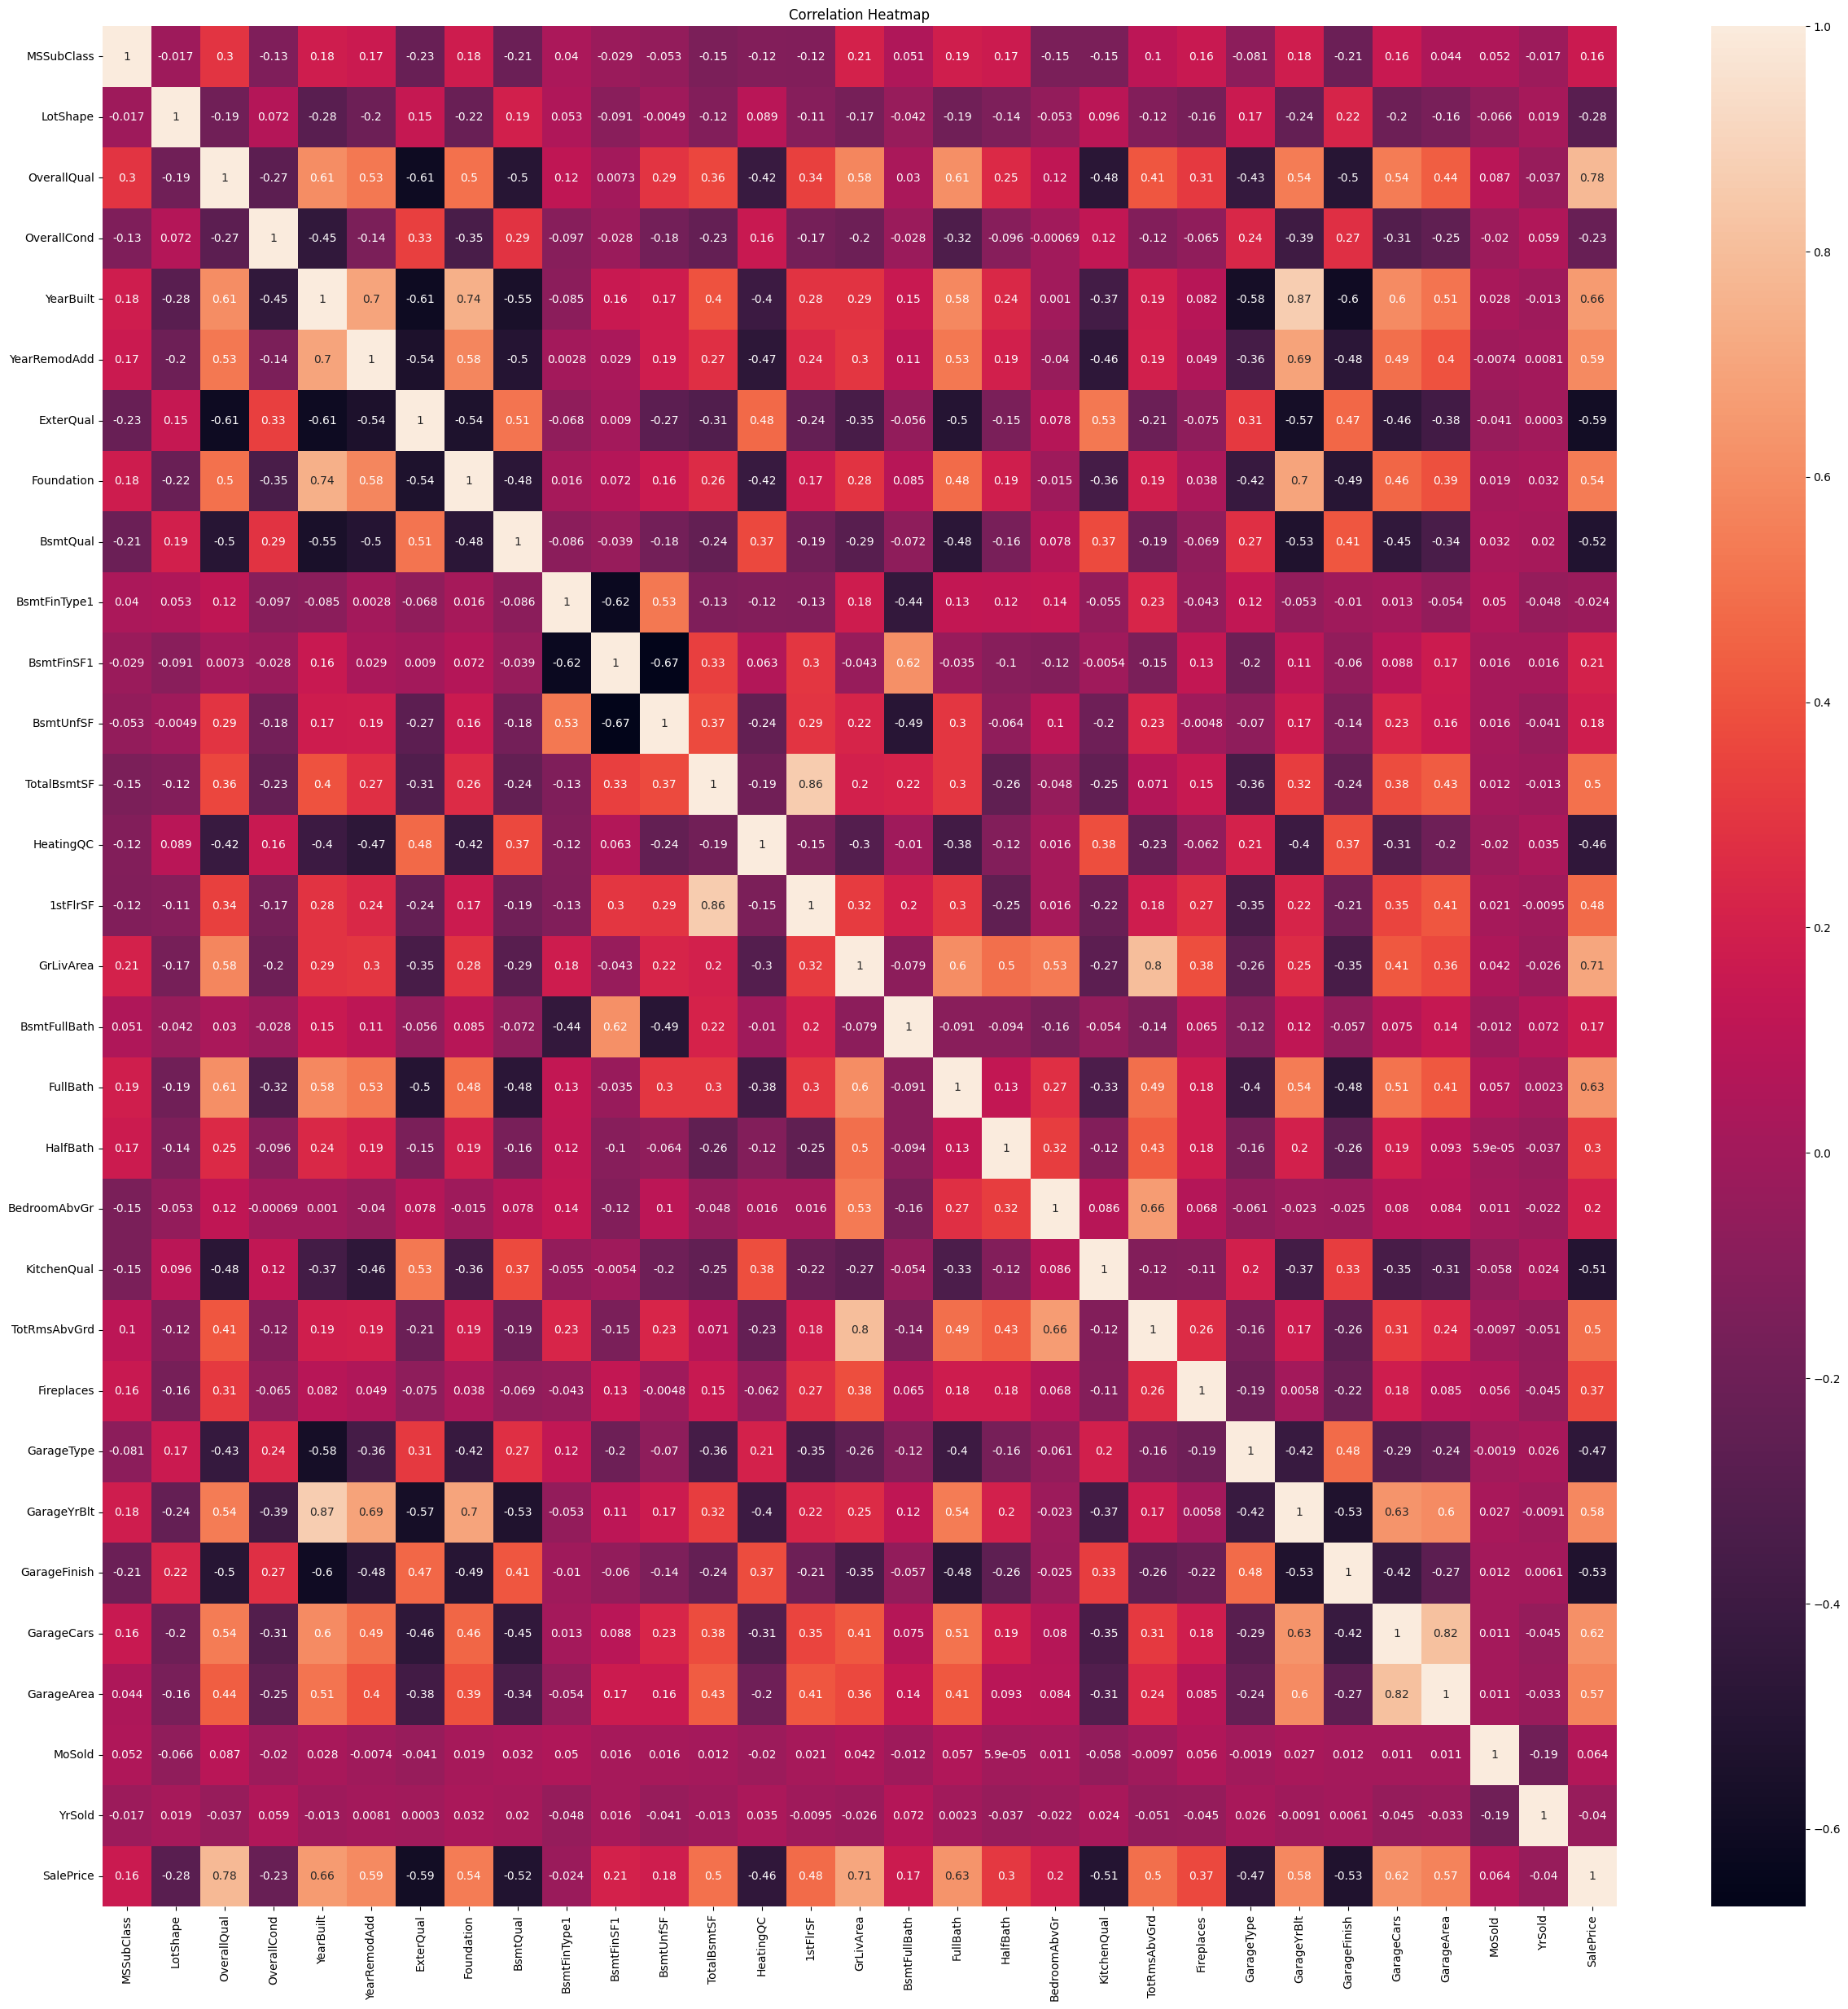

In [30]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

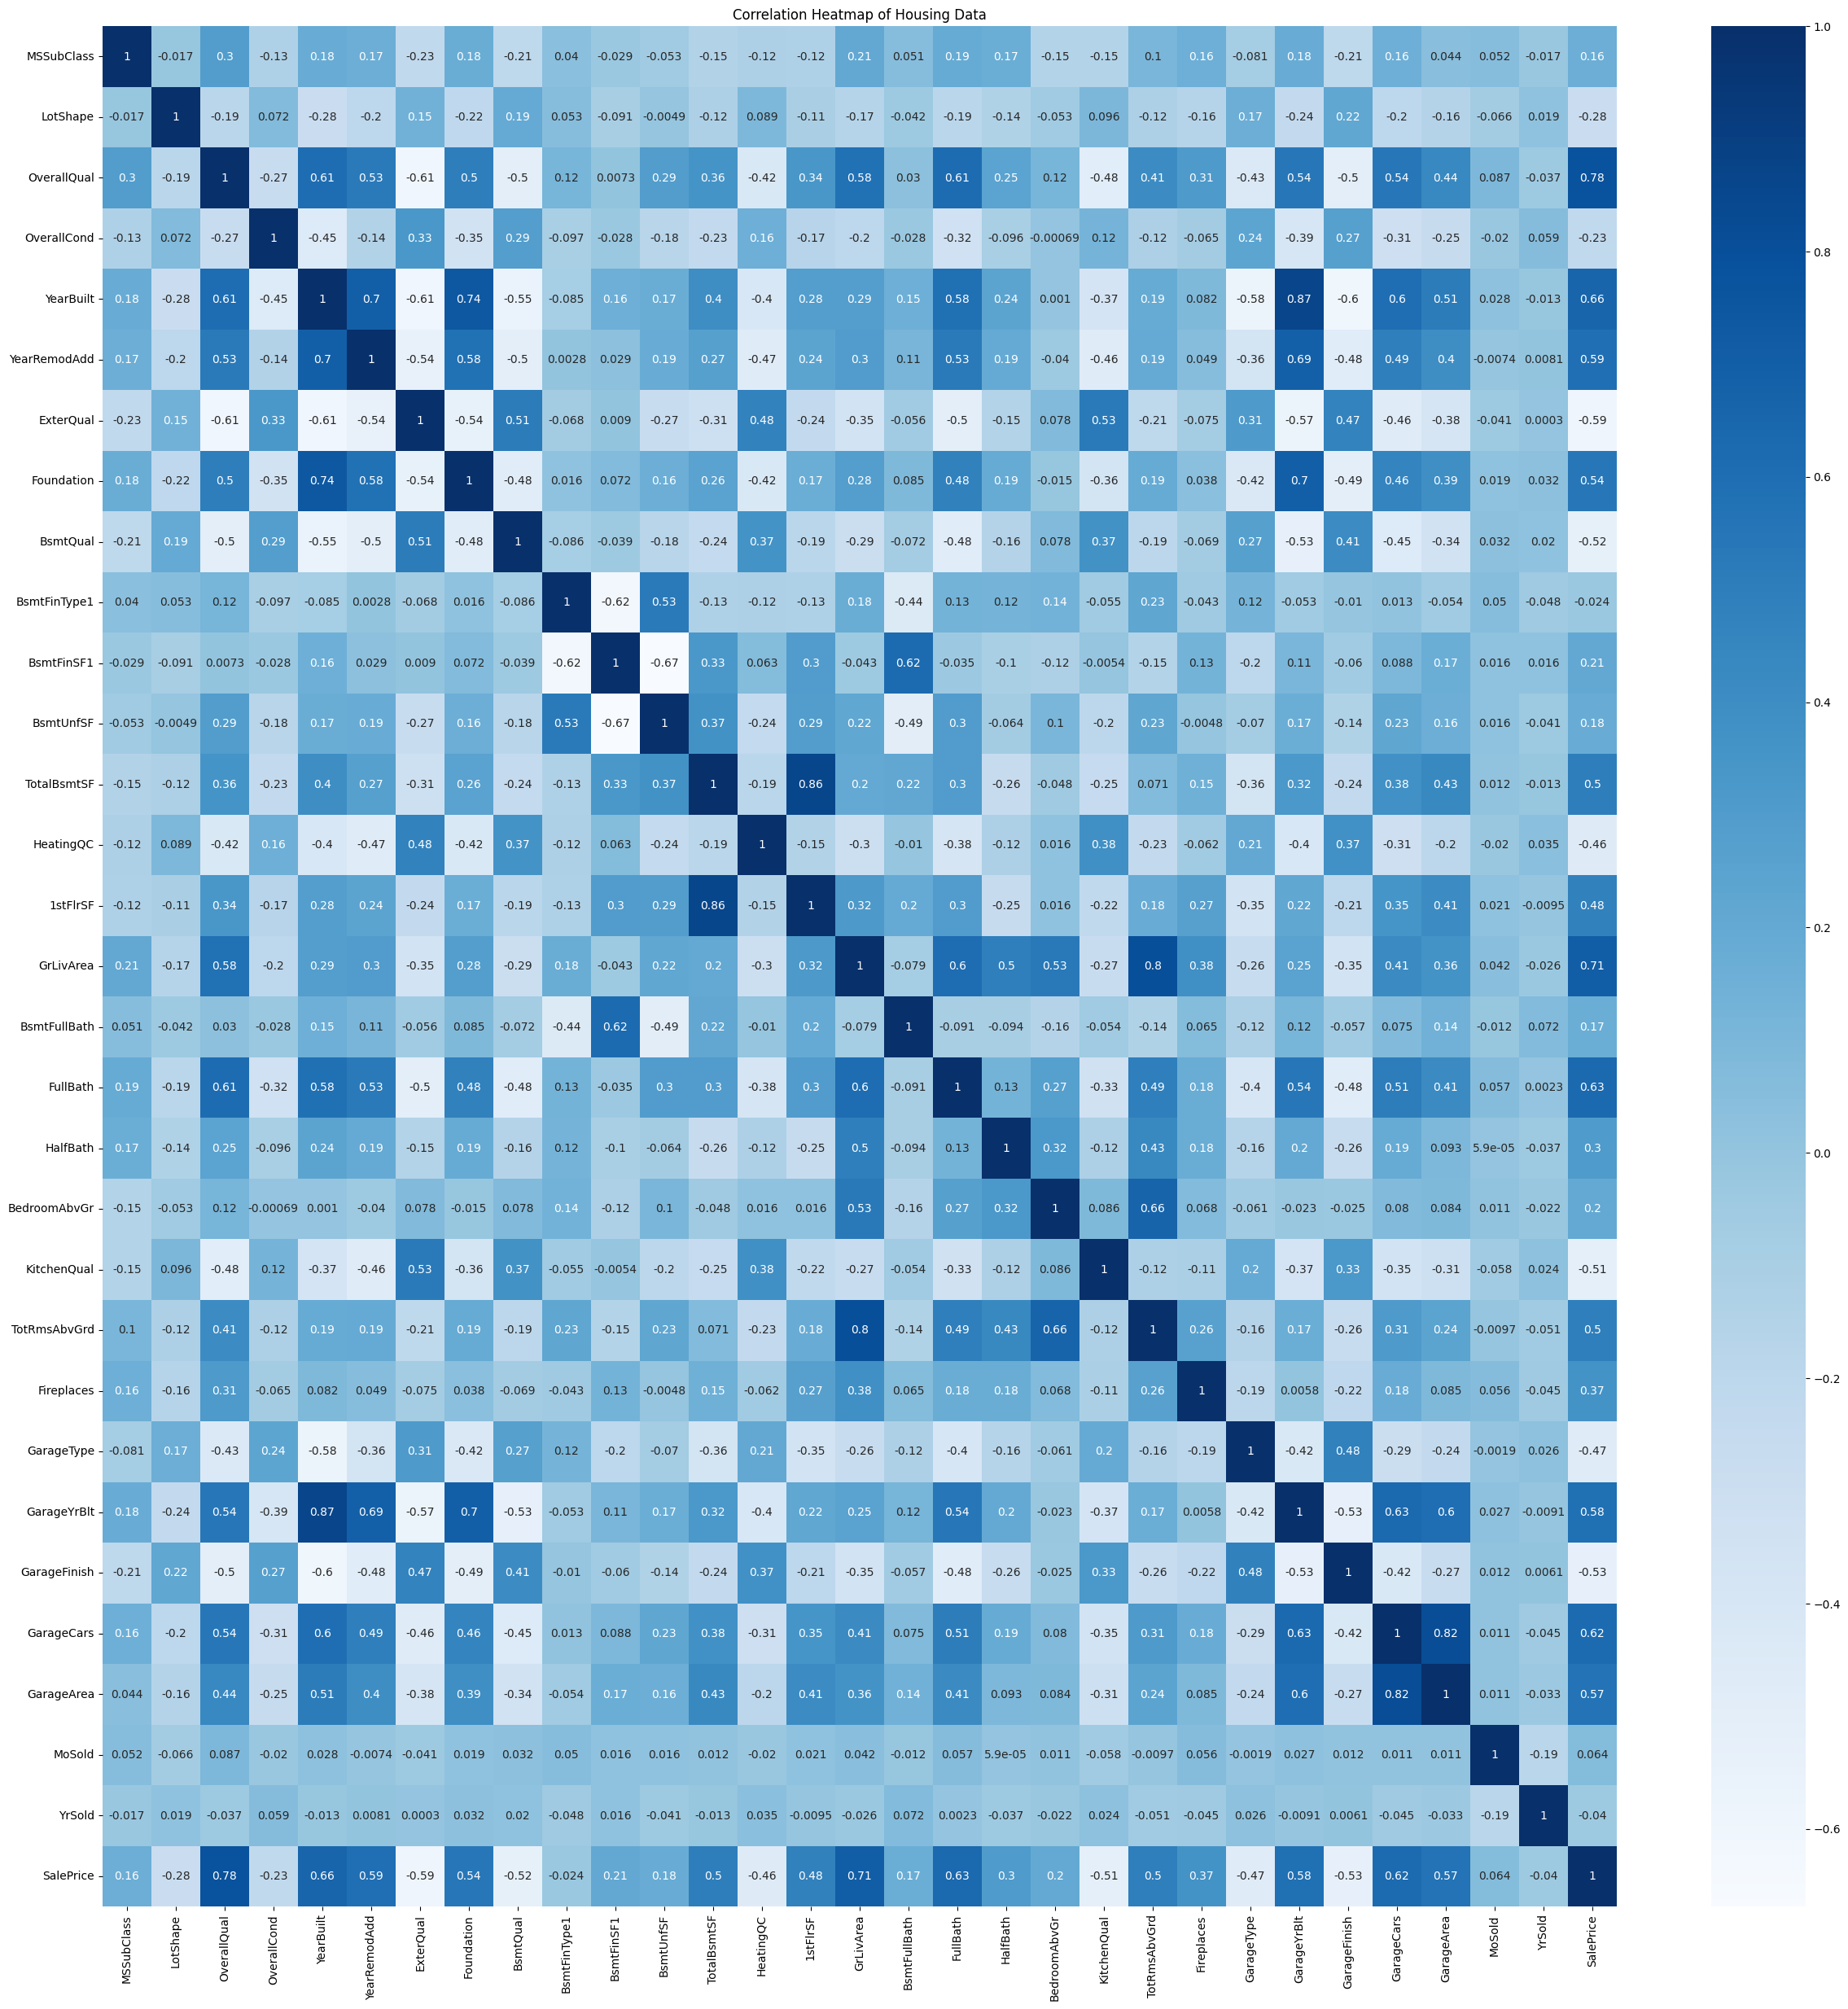

In [31]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

#### 'OverallQual' has the highest correlation with the target variable

#### Applying Simple Linear Regression

In [32]:
from sklearn.model_selection import train_test_split

x = pd.DataFrame(data['OverallQual'])
y = data['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [33]:
from sklearn.linear_model import LinearRegression

simple_linear_regression = LinearRegression()

simple_linear_regression.fit(x_train, y_train)

slr_predictions = simple_linear_regression.predict(x_test)

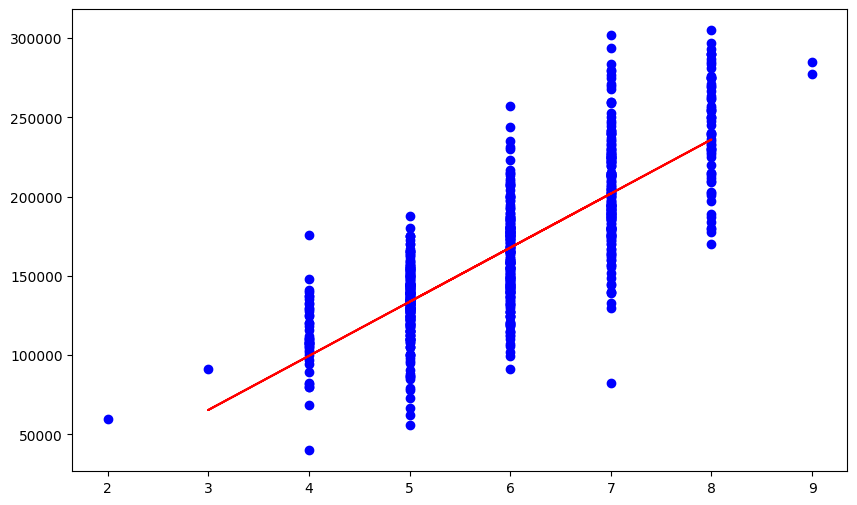

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_test, slr_predictions, color='red', label='Simple Linear Regerssion')
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, slr_predictions)
rmse = mean_squared_error(y_test, slr_predictions, squared=False)
mae = mean_absolute_error(y_test, slr_predictions)
score = r2_score(y_test, slr_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Mean Squared Error: 1051791357.7653147
Root Mean Squared Error: 32431.332963128647
Mean Absolute Error: 24220.597428800895
R2 Score: 0.5629596189643324


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Data Training for Multiple Linear Regression

In [36]:
data = data.drop(['GarageYrBlt'], axis=1)

In [37]:
x = data.drop('SalePrice', axis=1)
y = data['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [38]:
from sklearn.linear_model import LinearRegression

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x_train, y_train)

mlr_predictions = multiple_linear_regression.predict(x_test)

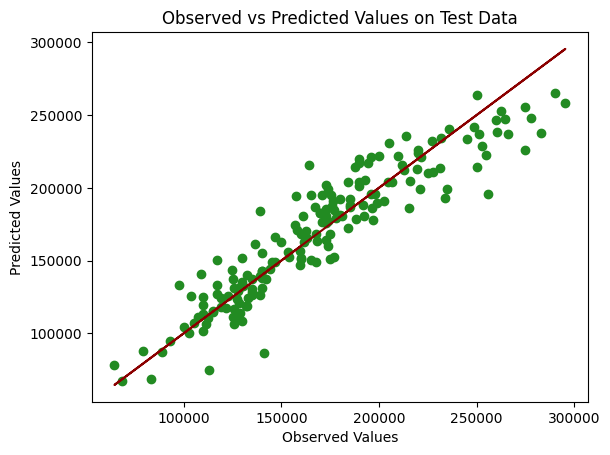

In [39]:
plt.scatter(y_test, mlr_predictions, color='forestgreen', label='model prediction')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred', label='actual value') # line for perfect prediction (true values)
plt.show()

In [40]:
mse = mean_squared_error(y_test, mlr_predictions)
rmse = np.sqrt(mean_absolute_error(y_test, mlr_predictions))
mae = mean_absolute_error(y_test, mlr_predictions)
score = r2_score(y_test, mlr_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Mean Squared Error: 329495865.71354866
Root Mean Squared Error: 116.59692617265767
Mean Absolute Error: 13594.843192912183
R2 Score: 0.8630878665830817


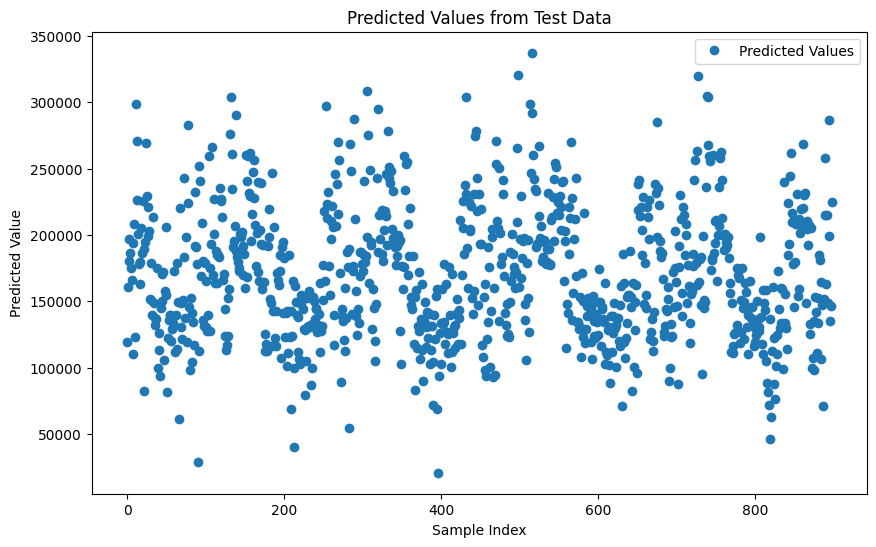

In [41]:
test_data = pd.read_csv('cleaned_test_data.csv')

predicted_values = multiple_linear_regression.predict(test_data)

plt.figure(figsize=(10, 6))
plt.plot(predicted_values, 'o', label='Predicted Values')
plt.title('Predicted Values from Test Data')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

In [42]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso()

lasso_model.fit(x_train, y_train)

lasso_predictions = lasso_model.predict(x_test)

mse = mean_squared_error(y_test, lasso_predictions)
rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
mae = mean_absolute_error(y_test, lasso_predictions)
score = r2_score(y_test, lasso_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Mean Squared Error: 329503437.23079264
Root Mean Squared Error: 18152.229538841577
Mean Absolute Error: 13594.45824852176
R2 Score: 0.8630847204659768


In [43]:
ridge_model = Ridge()

ridge_model.fit(x_train, y_train)

rigde_predictions = ridge_model.predict(x_test)

mse = mean_squared_error(y_test, rigde_predictions)
rmse = np.sqrt(mean_squared_error(y_test, rigde_predictions))
mae = mean_absolute_error(y_test, rigde_predictions)
score = r2_score(y_test, rigde_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Mean Squared Error: 329443653.9219324
Root Mean Squared Error: 18150.582743315223
Mean Absolute Error: 13591.872760769511
R2 Score: 0.8631095616285239


##### Ridge Regression has the highest accuracy

In [44]:
predicted_data = pd.DataFrame(mlr_predictions, columns=['predicted_values'])
predicted_data

,predicted_values
0,168510.885503
1,124644.237684
2,188344.952063
3,226142.455120
4,201701.363076
...,...
172,133242.187508
173,221155.646048
174,125573.541236
175,87400.618891


In [45]:
predicted_data.to_csv('predicted_data.csv', index=False)

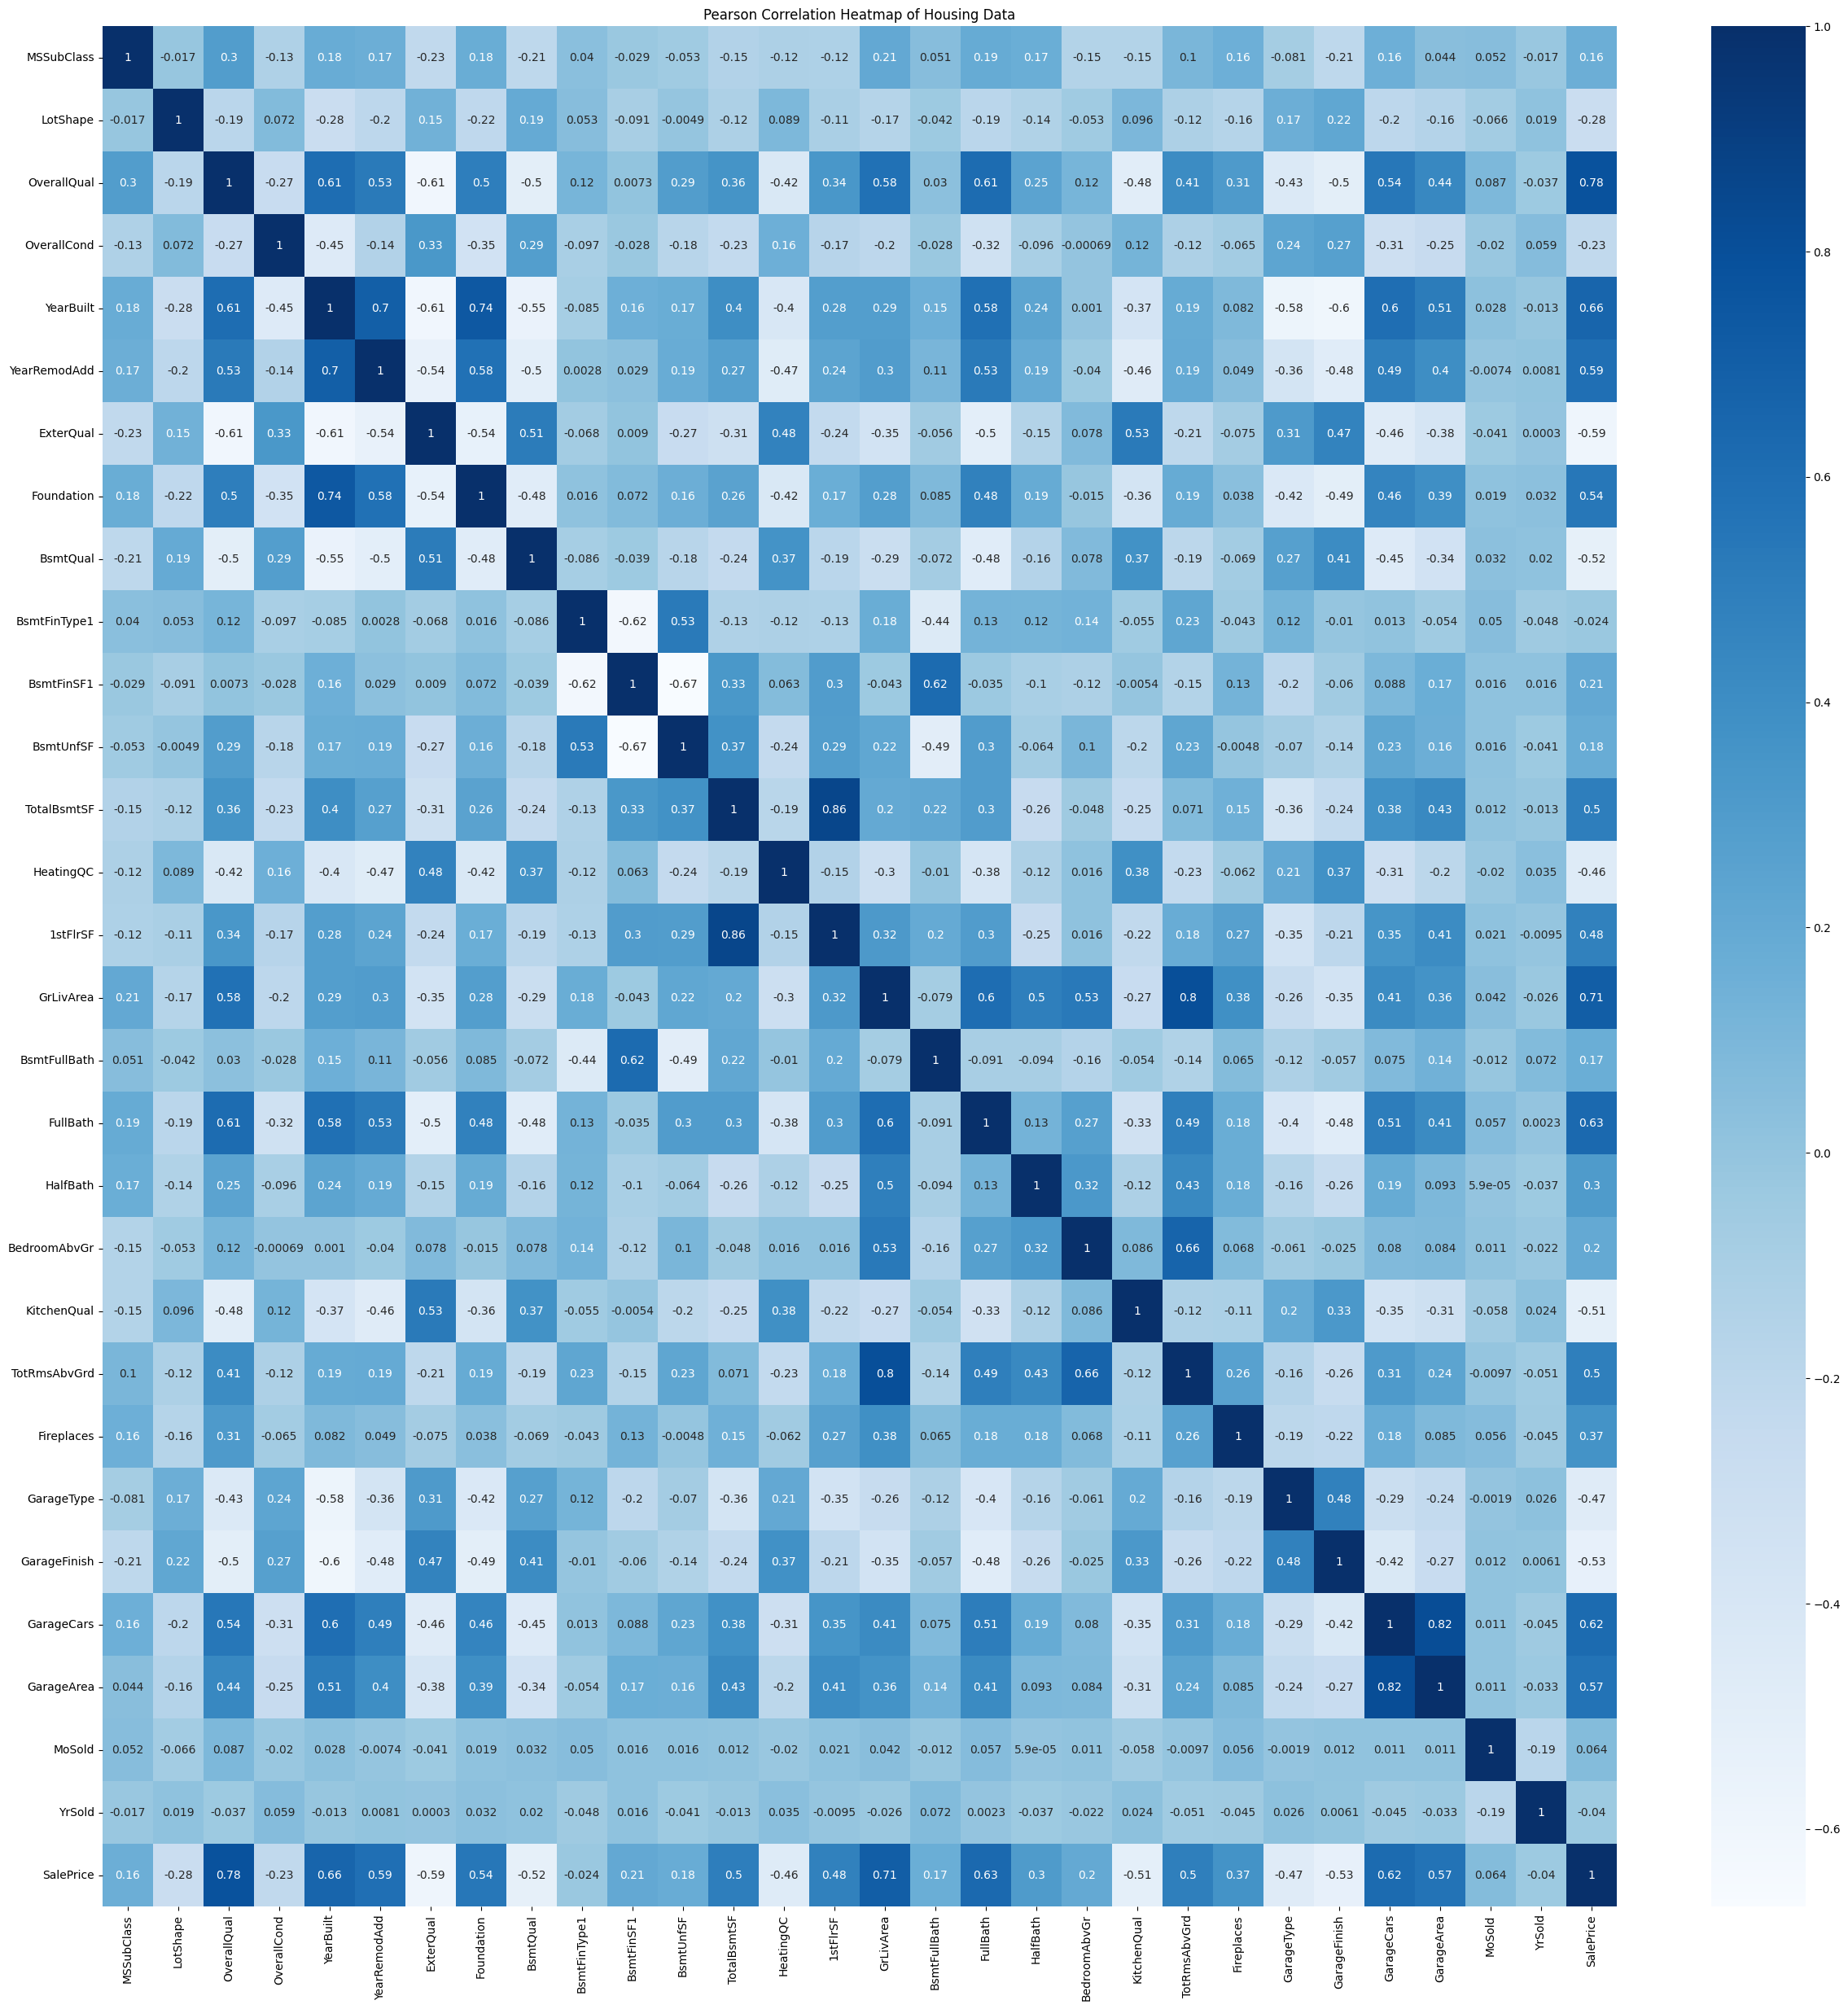

In [46]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='Blues')
plt.title('Pearson Correlation Heatmap of Housing Data')
plt.show()

#### Features with high correlation: 'OverallQual', 'GrLivArea', 'YearBuilt'

In [47]:
data_pear_corr = data[['OverallQual', 'GrLivArea', 'YearBuilt','SalePrice']]
data_pear_corr

,OverallQual,GrLivArea,YearBuilt,SalePrice
0,7,1710,2003,208500
2,7,1786,2001,223500
3,7,1717,1915,140000
4,8,2198,2000,250000
5,5,1362,1993,143000
...,...,...,...,...
1451,8,1578,2008,287090
1454,7,1221,2004,185000
1455,6,1647,1999,175000
1456,6,2073,1978,210000


In [48]:
x = data_pear_corr.drop('SalePrice', axis=1)
y = data_pear_corr['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [49]:
from sklearn.svm import SVR

svm_model = SVR(kernel='linear')
svm_model.fit(x_train, y_train)

SVR(kernel='linear')

In [50]:
svm_predictions = svm_model.predict(x_test)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, svm_predictions)
mse = mean_squared_error(y_test, svm_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svm_predictions)


print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²) Score: {r2}')

Mean Absolute Error (MAE): 19483.571566243736
Mean Squared Error (MSE): 696817823.4811062
Root Mean Squared Error (RMSE): 26397.307125559346
R-squared (R²) Score: 0.710458234099145


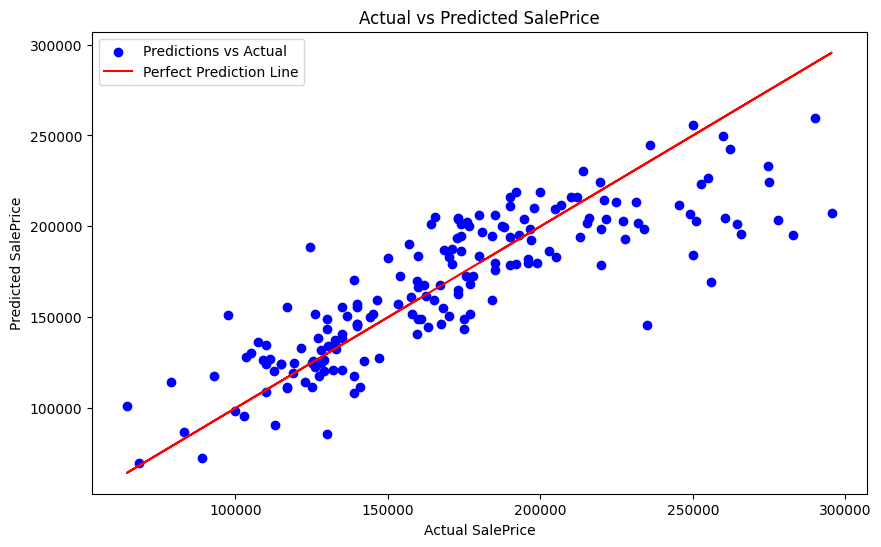

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_predictions, color='blue', label='Predictions vs Actual')

# Line showing perfect prediction
plt.plot(y_test, y_test, color='red', label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()